# Simple Astra run

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
from astra import Astra,  AstraGenerator, tools, template_dir, run_astra, run_astra_with_generator
import os

In [3]:
# Path to ASTRA executable file
MY_ASTRA_BIN = '$HOME/Code/astra/bin/Astra'

# Input template file 
MY_TEMPLATE = os.path.join(template_dir, 'dcgun/astra.in')


In [4]:
a = Astra(input_file=MY_TEMPLATE, astra_bin=MY_ASTRA_BIN)

In [5]:
# Change some inputs
a.input['newrun']['zemit']  = 1000
a.input['newrun']['zphase'] = 2
a.input['newrun']['phases'] = True
a.input['newrun']['zstop']  = 1


In [6]:
a.verbose = True
a.run()

init dir:  /Users/chrisonian/Code/GitHub/lume-astra/examples
running astra in /private/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpz1xxq4d9
 --------------------------------------------------------------------------

               Astra- A space charge tracking algorithm 
                            Version 3.0              
                        DESY,  Hamburg 2011          
                        Fri Jan 10 11:35:12 

     Parameter file is:  astra.in                                          
     astra input file for L0 injector (20070501_1)                                   

 Initialize element settings:
     neglecting space charge forces 

 --------------------------------------------------------------------------
 Cavity:

     Reading cavity field data from:      /Users/chrisonian/Code/GitHub/lume-astra/templates/dcgun/dcgun_GHV.dat          
     maximum gradient                     -11.60     MV/m
     at                                   3.9750E-02 m
     estimat

In [7]:
a.output.keys()

dict_keys(['z', 't', 'x_average', 'x_rms', 'xp_rms', 'x_normemit', 'xxp_average', 'y_average', 'y_rms', 'yp_rms', 'y_normemit', 'yyp_average', 'E_kinetic', 'z_rms', 'deltaE_rms', 'z_normemit', 'zEp_average', 'z_for_landf', 'n_particles', 'total_charge', 'n_lost', 'energy_deposited', 'energy_exchange', 'start_time', 'run_time', 'run_error'])

In [8]:
a.input_file

'/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpz1xxq4d9/astra.in'

In [9]:
a.path

'/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpz1xxq4d9'

In [10]:
a.load_screens()

loading 2 screens
[50.0, 100.0]


In [11]:
a.screen[0].keys()

dict_keys(['x', 'y', 'z_ref', 'z_rel', 'px', 'py', 'pz_ref', 'pz_rel', 't_ref', 't_rel', 'qmacro', 'status', 'species_index'])

# Alternatives: run_astra, evaluate_astra

This is the functional way to run astra and return the evaluate Astra object, or simple dict of outputs

Settings is a list of settings that can appear in the input file.

In [12]:
settings0 = {'zstop':1, 'zemit':200, 'zphase':1, 'phases':True}

# Just run astra
a2 = run_astra(settings0, astra_input_file=MY_TEMPLATE, verbose=True, timeout=100)

run_astra
zstop is in astra newrun
zemit is in astra newrun
zphase is in astra newrun
phases is in astra newrun
init dir:  /Users/chrisonian/Code/GitHub/lume-astra/examples
running astra in /private/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpze_t6ic8


In [13]:
MY_GENERATOR_TEMPLATE = os.path.join(template_dir, 'dcgun/generator.in')

# Run Astra with Generator
settings0['ipart']= 1234

a3 = run_astra_with_generator(settings0, astra_input_file=MY_TEMPLATE,
                              generator_input_file=MY_GENERATOR_TEMPLATE, verbose=True)

run_astra_with_generator
zstop is in astra newrun
zemit is in astra newrun
zphase is in astra newrun
phases is in astra newrun
ipart is in generator
set spacecharge mesh for n_particles: 1234 to {'nrad': 9, 'nlong_in': 17}
 --------------------------------------------------------------------------

                              generator              
                             Version 1.0             
                        DESY,  Hamburg 2002          
                        Fri Jan 10 11:35:18 

     Working File is:    temp_generator.in                                 
     Initializing       1234      electrons
     including 6 probe particles at standard positions
     Particles start from a cathode
     Particles are quasi randomly distributed

          Energy spread too high.
                  28 times standard correction procedure



     Final check:
     Particles taken into account      N =       1234
     total charge                      Q =    -0.1000     nC
     ho

In [14]:
# An even simpler run, returns a simple dict of outputs. For use in optimization

from astra import evaluate_astra_with_generator

MY_GENERATOR_TEMPLATE = os.path.join(template_dir, 'dcgun/generator.in')

# Run Astra with Generator
settings0['ipart']= 1234

outputs = evaluate_astra_with_generator(settings0, astra_input_file=MY_TEMPLATE,
                              generator_input_file=MY_GENERATOR_TEMPLATE, verbose=False)
outputs 

{'error': False,
 'end_z': 1.0,
 'end_t': 4.0157e-09,
 'end_x_average': -2.6224e-07,
 'end_x_rms': 0.0011177,
 'end_xp_rms': 0.0018667,
 'end_x_normemit': 1.0924e-06,
 'end_xxp_average': 0.0017767,
 'end_y_average': 1.4375999999999998e-07,
 'end_y_rms': 0.0011274,
 'end_yp_rms': 0.0018777,
 'end_y_normemit': 1.0985e-06,
 'end_yyp_average': 0.0017888,
 'end_E_kinetic': 499790.0,
 'end_z_rms': 0.0022522,
 'end_deltaE_rms': 1.3934,
 'end_z_normemit': 0.0031365,
 'end_zEp_average': 0.044319,
 'end_z_for_landf': 1.0,
 'end_n_particles': 1234.0,
 'end_total_charge': 1.0000000000000002e-10,
 'end_n_lost': 0.0,
 'end_energy_deposited': 0.0,
 'end_energy_exchange': 4.9979e-05,
 'start_time': 1578684919.889556,
 'run_time': 1.287519931793213,
 'run_error': False,
 'end_higher_order_energy_spread': 2.465641292052652,
 'end_n_particle_loss': 0,
 'fingerprint': 'a6eb329ed080ff4eb2bbe17caa8419f4'}

In [15]:
?evaluate_astra_with_generator

Signature:
evaluate_astra_with_generator(
    settings,
    archive_path=None,
    merit_f=None,
    **params,
)
Docstring: Convenience wrapper. See evaluate. 
File:      ~/Code/GitHub/lume-astra/astra/evaluate.py
Type:      function


# Load previously computed run

In [16]:
a4 = Astra(input_file=a.input_file, use_tempdir = False )
a4.load_output()
a4.output.keys()
a4.path

'/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpz1xxq4d9'

# Archive screens, output to HDF5 in openPMD beamphysics format

In [17]:
H5FILE='astra.h5'

In [18]:
a.archive(H5FILE)

Archiving to file astra.h5


'astra.h5'

In [19]:
# If no file is given, a filename will be invented based on the fingerprint
H5FILE2 = a2.archive()

Archiving to file astra_c067a48afcdce250b3f2d6c71856f25f.h5


# Read openPMD

In [20]:
import h5py
h5 = h5py.File(H5FILE, 'r')

In [21]:
# Base attributes
dict(h5.attrs)

{'basePath': b'/screen/%T/',
 'dataType': b'openPMD',
 'openPMD': b'2.0.0',
 'openPMDextension': b'BeamPhysics;SpeciesType',
 'particlesPath': b'/'}

In [22]:
# Groups
list(h5)[0:10]

['input', 'output', 'screen']

In [23]:
# Screens
list(h5['screen/'])[0:10]

['0', '1']

# Plot openPMD beamphysics

In [24]:
from pmd_beamphysics import ParticleGroup, particle_paths
from pmd_beamphysics.plot import marginal_plot

In [25]:
ppaths = particle_paths(h5)
ppaths

['/screen/0//', '/screen/1//']

In [26]:
P = ParticleGroup(h5[ppaths[0]])
str(P)

'ParticleGroup with 998 particles with total charge 9.989979999999996e-11 C'

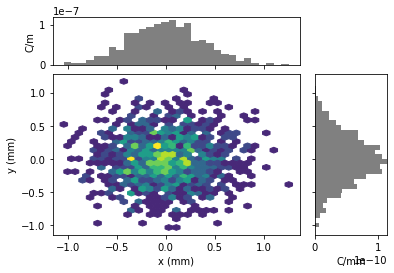

In [27]:
marginal_plot(P, 'x', 'y', bins=30)

In [28]:
# Cleanup
os.remove(H5FILE)
os.remove(H5FILE2)